In [1]:
import geopandas as gpd
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

/tmp/ipykernel_3991784/2954871998.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:

geojson = f"./results/difference_2021_2023_qa_400.geojson"
qa_gdf = gpd.read_file(geojson)
qa_gdf.loc[(qa_gdf['method'] == 's2')].sort_values(by='abs_mean', ascending=False)

,DN,mean,abs_mean,real,method,what,geometry
150,1,0.876126,0.876126,1,s2,road,"POLYGON ((561540.000 6609870.000, 561540.000 6..."
151,1,0.863616,0.863616,1,s2,road,"POLYGON ((504580.000 6625840.000, 504580.000 6..."
152,1,0.848323,0.848323,1,s2,road,"POLYGON ((501190.000 6609870.000, 501190.000 6..."
153,1,0.846071,0.846071,1,s2,road,"POLYGON ((549440.000 6601200.000, 549440.000 6..."
154,1,0.841730,0.841730,1,s2,road,"POLYGON ((525220.000 6628350.000, 525220.000 6..."
...,...,...,...,...,...,...,...
252,1,0.644458,0.644458,0,s2,road,"POLYGON ((586130.000 6656610.000, 586130.000 6..."
259,-1,-0.638239,0.638239,0,s2,water level,"POLYGON ((588600.000 6675150.000, 588600.000 6..."
276,1,0.633265,0.633265,1,s2,road,"POLYGON ((577330.000 6677120.000, 577330.000 6..."
253,1,0.623890,0.623890,1,s2,road,"POLYGON ((532460.000 6683920.000, 532460.000 6..."


In [3]:
# methods = list(qa_gdf.method.unique())
methods = ['s2','s1', 's1s2_merge','s1s2_append']
for method in methods:
    n_change = len(qa_gdf.loc[(qa_gdf['method'] == method) & (qa_gdf['real'] != '0')])
    n_correct = len(qa_gdf.loc[(qa_gdf['method'] == method) & (qa_gdf['DN'] == qa_gdf['real'])])
    print(f"Method: {method}, changes: {n_change}, correct: {n_correct}")

Method: s2, changes: 60, correct: 60
Method: s1, changes: 23, correct: 20
Method: s1s2_merge, changes: 52, correct: 47
Method: s1s2_append, changes: 44, correct: 44


In [4]:
categories = list(qa_gdf.what.unique())
display(categories)

['water level',
 'construction',
 'industrial activity',
 'road',
 'deconstruction',
 'forestry',
 'railroad',
 'unknown',
 'agricultural']

In [5]:
true_f = (qa_gdf['real'] != '0')
false_f = (qa_gdf['real'] == '0')

counts_true = []
counts_false = []


for category in categories:
    print(category)
    categoty_f = (qa_gdf['what'] == category)
    cat_counts_true = []
    cat_counts_false = []
    for method in methods:
        # print(method)
        method_f = (qa_gdf['method'] == method)
        cat_counts_true.append(len(qa_gdf.loc[ true_f & method_f & categoty_f]))
        cat_counts_false.append(len(qa_gdf.loc[ false_f & method_f & categoty_f]))
    counts_true.append(cat_counts_true)
    counts_false.append(cat_counts_false)
    print(cat_counts_true)
    print(cat_counts_false)
display(counts_true)
display(counts_false)

water level
[0, 0, 0, 0]
[6, 15, 16, 22]
construction
[5, 22, 18, 20]
[0, 0, 0, 0]
industrial activity
[0, 0, 0, 0]
[6, 33, 3, 20]
road
[55, 0, 32, 23]
[15, 0, 10, 5]
deconstruction
[0, 1, 2, 1]
[0, 0, 0, 0]
forestry
[0, 0, 0, 0]
[9, 0, 5, 1]
railroad
[0, 0, 0, 0]
[1, 0, 1, 0]
unknown
[0, 0, 0, 0]
[0, 23, 0, 4]
agricultural
[0, 0, 0, 0]
[3, 6, 13, 4]


[[0, 0, 0, 0],
 [5, 22, 18, 20],
 [0, 0, 0, 0],
 [55, 0, 32, 23],
 [0, 1, 2, 1],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0]]

[[6, 15, 16, 22],
 [0, 0, 0, 0],
 [6, 33, 3, 20],
 [15, 0, 10, 5],
 [0, 0, 0, 0],
 [9, 0, 5, 1],
 [1, 0, 1, 0],
 [0, 23, 0, 4],
 [3, 6, 13, 4]]

In [6]:
methods_label = (
    "EO",
    "SAR",
    "Merge",
    "Append"
)

counts = {
    'Road (true change)':np.array(counts_true[3]),
    'Construction (true change)':np.array(counts_true[1]),
    'Deonstruction (true change)':np.array(counts_true[4]),
    'Road (false change)':np.array(counts_false[3]),
    'Industrial Activity (false change)':np.array(counts_false[2]),
    'Agricultural (false change)':np.array(counts_false[8]),
    'Forestry (false change)':np.array(counts_false[5]),
    'Change in water level (false change)':np.array(counts_false[0]),
    'Railroad (false change)':np.array(counts_false[6]),
    'Unknown (false change)':np.array(counts_false[7]),
}
counts

{'Road (true change)': array([55,  0, 32, 23]),
 'Construction (true change)': array([ 5, 22, 18, 20]),
 'Deonstruction (true change)': array([0, 1, 2, 1]),
 'Road (false change)': array([15,  0, 10,  5]),
 'Industrial Activity (false change)': array([ 6, 33,  3, 20]),
 'Agricultural (false change)': array([ 3,  6, 13,  4]),
 'Forestry (false change)': array([9, 0, 5, 1]),
 'Change in water level (false change)': array([ 6, 15, 16, 22]),
 'Railroad (false change)': array([1, 0, 1, 0]),
 'Unknown (false change)': array([ 0, 23,  0,  4])}

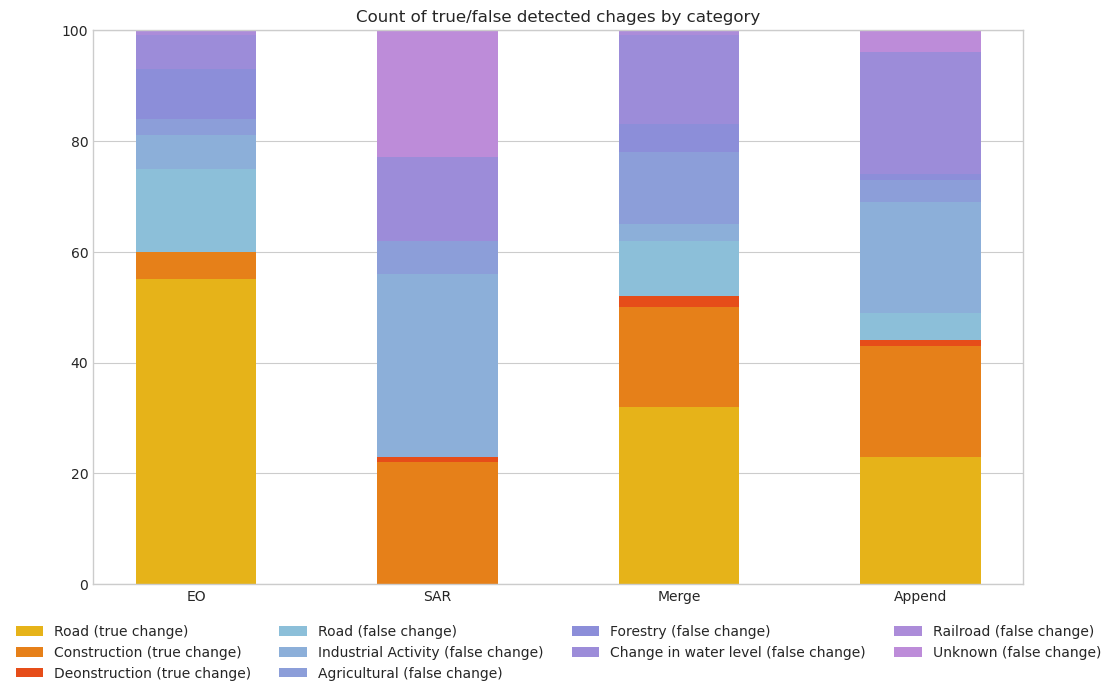

In [7]:

from colorsys import hls_to_rgb

#colors = ['#004c00', '#008000', '#66b266','#fa9e9e', '#fa8e8e','#f97e7e','#f86e6e','#f85e5e','#df5454','#c64b4b','#ad4141']

colors = []
h_start, h_stop = 15,45
stops = 3

l = .5
s = .8
for h in reversed(range(h_start,h_stop+1,int((h_stop-h_start)/(stops-1)))):
    colors.append(hls_to_rgb(h/360,l,s))

h_start, h_stop = 200,280
stops = 7
l = .7
s = .5
for h in range(h_start,h_stop+1,int((h_stop-h_start)/(stops-1))):
    colors.append(hls_to_rgb(h/360,l,s))

width = 0.5

fig, ax = plt.subplots(figsize=(12,8))
bottom = np.zeros(4)

for i, (category, count) in enumerate(counts.items()):
    p = ax.bar(methods_label, count, width, label=category, bottom=bottom, color=colors[i])
    bottom += count

ax.set_title("Count of true/false detected chages by category")
# ax.legend(loc="upper right")


# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

plt.show()

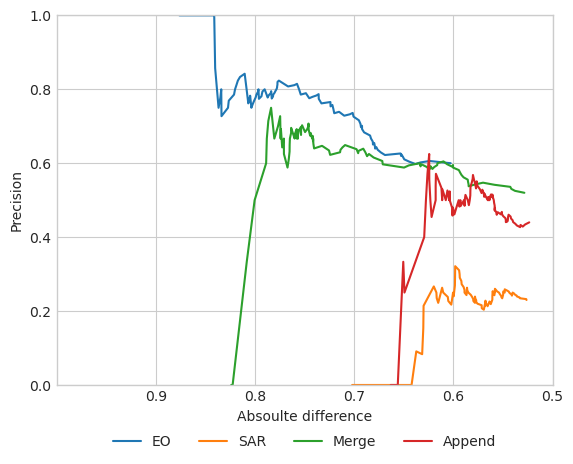

In [28]:
qa_gdf['sum'] = qa_gdf.abs_mean * qa_gdf.geometry.area
qa_gdf = qa_gdf.sort_values(by='abs_mean', ascending=False)
# display(qa_gdf)

true_f = (qa_gdf['real'] != '0')

for i, method in enumerate(methods):
    # print(method)
    method_f = (qa_gdf['method'] == method)
    qa_gdf_m = qa_gdf.loc[method_f]
    # display(qa_gdf_m)

    score = []
    precision = []
    for j in range(len(qa_gdf_m)):
        # display(qa_gdf_m.head(j+1))
        n_true = len(qa_gdf_m.head(j+1).loc[true_f])
        # print(n_true, len(qa_gdf_m.head(j+1)), min(qa_gdf_m.abs_mean.head(j+1)))
        score.append(min(qa_gdf_m.abs_mean.head(j+1)))
        precision.append(n_true / len(qa_gdf_m.head(j+1)))
    # display(precision)

    x = score
    y = precision

    plt.plot(x, y)

plt.ylabel('Precision')
plt.ylim(0,1)
plt.xlabel('Absoulte difference')
plt.xlim(1,0.5)

plt.xticks([0.9,0.8,0.7,0.6,0.5])

plt.legend(methods_label, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=4)

plt.show()